In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, MaxPooling1D
from tensorflow.keras.layers import LSTM, Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, mean_absolute_error
pd.options.display.max_rows = 6000
import keras

In [2]:
tf.random.set_seed(7)

In [3]:
X = pd.read_csv('data_with_weather_wo_outliers.csv')
X = X.set_index('Date')
X.index = pd.to_datetime(X.index)
y = X.loc[:, 'total_demand'].copy()
X = X.drop(['total_demand'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [4]:
X_train = np.expand_dims(X_train, axis=2)
X_test = np.expand_dims(X_test, axis=2)

In [10]:
my_callbacks = [
    keras.callbacks.ModelCheckpoint(filepath='cnn_lstm.{epoch:02d}-{val_loss:.2f}.keras')
]

In [11]:
model = Sequential()
model.add(Conv1D(16, (3), activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Conv1D(32, (3), activation='relu'))
model.add(Conv1D(64, (3), activation='relu'))
model.add(MaxPooling1D(15, (3)))
model.add(LSTM(units=64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1))
optimizer = keras.optimizers.Adam(learning_rate=0.00001)
model.compile(loss='mape', optimizer=optimizer)

In [12]:
history = model.fit(X_train, y_train, epochs=50, batch_size=1000, validation_data=(X_test, y_test), callbacks=my_callbacks)

Epoch 1/50
633/633 [==============================] - 199s 309ms/step - loss: 56.2613 - val_loss: 34.1160
Epoch 2/50
633/633 [==============================] - 219s 346ms/step - loss: 37.3627 - val_loss: 23.7744
Epoch 3/50
633/633 [==============================] - 222s 350ms/step - loss: 32.9579 - val_loss: 22.3688
Epoch 4/50
633/633 [==============================] - 227s 358ms/step - loss: 31.1616 - val_loss: 22.0555
Epoch 5/50
633/633 [==============================] - 229s 362ms/step - loss: 29.9939 - val_loss: 21.5752
Epoch 6/50
633/633 [==============================] - 313s 494ms/step - loss: 29.1985 - val_loss: 21.5574
Epoch 7/50
633/633 [==============================] - 349s 552ms/step - loss: 28.5873 - val_loss: 20.7535
Epoch 8/50
633/633 [==============================] - 352s 557ms/step - loss: 28.1095 - val_loss: 20.3176
Epoch 9/50
633/633 [==============================] - 336s 531ms/step - loss: 27.7238 - val_loss: 20.2563
Epoch 10/50
633/633 [=========================

KeyboardInterrupt: 

In [26]:
epochs = [i for i in range(1, 39)]
val_loss = [34.1160, 23.7744, 22.3688, 22.0555, 21.5752, 21.5574, 20.7535, 20.3176, 20.2563, 20.1897, 20.5343, \
            20.8277, 20.4668, 20.5517, 20.6678, 20.6678, 20.9137, 20.7659, 20.9746, 20.8107, 21.3233, 21.1689, \
            21.9786, 21.6919, 21.9365, 21.7266, 22.5955, 22.8799, 22.7346, 22.4373, 22.6774, 22.6684, 22.6670, \
            22.7818, 22.9316, 23.0352, 23.2505, 23.4442, 23.4916]
train_loss = [56.2613, 37.3627, 32.9579, 31.1616, 29.9939, 29.1985, 28.5873, 28.1095, 27.7238, 27.3467, 27.0787, \
              26.8280, 26.6279, 26.4463, 26.2597, 26.2597, 26.0392, 25.8118, 25.6245, 25.4930, 25.3412, 25.2231, \
                25.0926, 25.0207, 24.8670, 24.7653, 24.6705, 24.5546, 24.4582, 24.3962, 24.3146, 24.2378, 24.1595, \
                  24.0874, 23.9822, 23.8946, 23.8214, 23.7306, 23.6309]

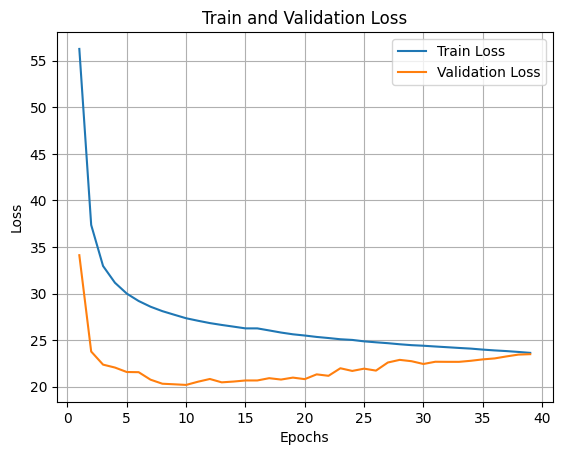

In [28]:
# Plot the train and validation loss
plt.figure()
plt.plot(range(1, len(train_loss) + 1), train_loss, label='Train Loss')
plt.plot(range(1, len(val_loss) + 1), val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Train and Validation Loss')
plt.legend()
plt.grid()
plt.show()

In [11]:
model.save('cnn_lstm.keras')

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   


 conv1d (Conv1D)             (None, 70, 16)            64        
                                                                 
 conv1d_1 (Conv1D)           (None, 68, 32)            1568      
                                                                 
 conv1d_2 (Conv1D)           (None, 66, 64)            6208      
                                                                 
 max_pooling1d (MaxPooling1D  (None, 18, 64)           0         
 )                                                               
                                                                 
 lstm (LSTM)                 (None, 64)                33024     
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense (Dense)               (None, 1)                 65        
                                                                 
Total para

In [15]:
trainPredict = model.predict(X_train)
testPredict = model.predict(X_test)

4941/4941 [==============================] - 49s 10ms/step


In [16]:
training_mae = mean_absolute_error(y_train, trainPredict)
test_mae = mean_absolute_error(y_test, testPredict)
print("Training MAE:", round(training_mae, 4))
print("Test MAE:", round(test_mae, 4))

Training MAE: 59.4164
Test MAE: 47.3274


In [17]:
training_mape = mean_absolute_percentage_error(y_train, trainPredict)
test_mape = mean_absolute_percentage_error(y_test, testPredict)
print(f"\n\nTraining MAPE: {round(training_mape, 4)*100} %")
print(f"Test MAPE: {round(test_mape, 4) *100} %")



Training MAPE: 21.45 %
Test MAPE: 23.26 %


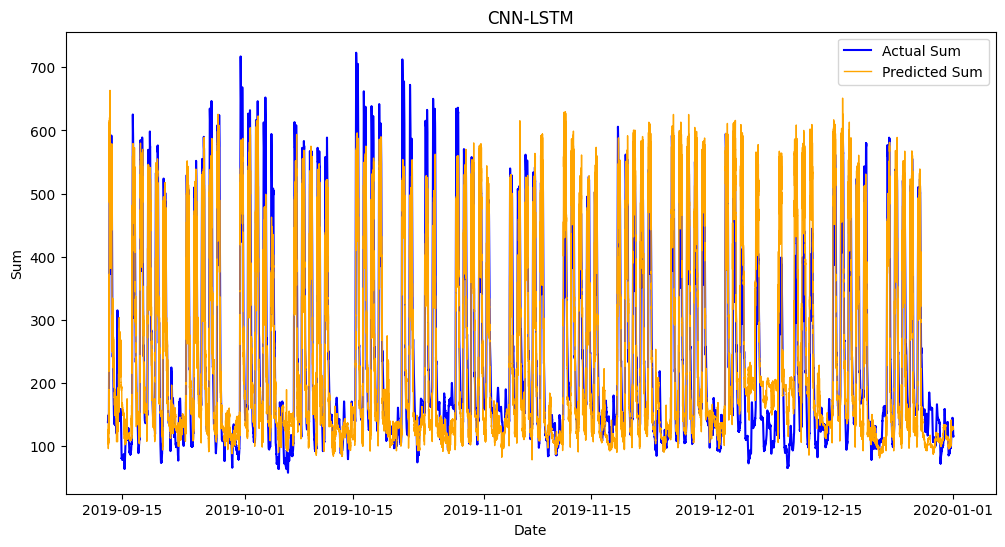

In [18]:
X.index = pd.to_datetime(X.index)
cutoff = int(len(X) * 0.8)

cutoff = int(len(X) * 0.8)
plt.figure(figsize=(12, 6))
plt.plot(X[cutoff:].index, y_test, color='blue', label='Actual Sum')
plt.plot(X[cutoff:].index, testPredict, color='orange', linewidth=1, label='Predicted Sum')
#plt.plot(X[:cutoff].index, y_train, color='blue', label='Actual Sum')
#plt.plot(X[:cutoff].index, trainPredict, color='orange', linewidth=1, label='Predicted Sum')
plt.xlabel('Date')
plt.ylabel('Sum')
plt.title('CNN-LSTM')
plt.legend()
plt.show()

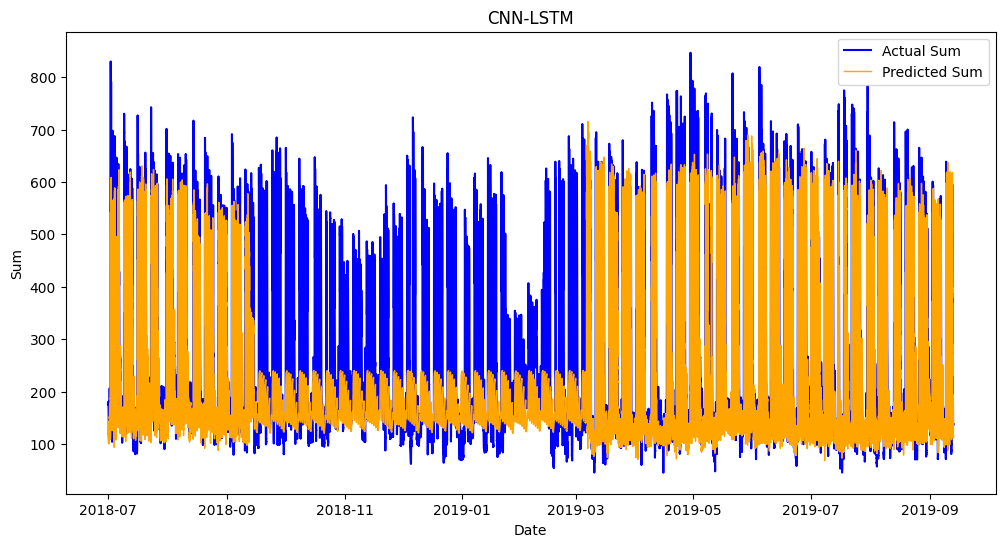

In [19]:
X.index = pd.to_datetime(X.index)
cutoff = int(len(X) * 0.8)

plt.figure(figsize=(12, 6))
plt.plot(X[:cutoff].index, y_train, color='blue', label='Actual Sum')
plt.plot(X[:cutoff].index, trainPredict, color='orange', linewidth=1, label='Predicted Sum')
plt.xlabel('Date')
plt.ylabel('Sum')
plt.title('CNN-LSTM')
plt.legend()
plt.show()